### Método Clustering Jerarquico (CJ)
##### El clustering jeráquico suele representarse a través de un dendograma, que muestra en que orden se han unido los cluster y cuál es el grado de proximidad qeu tienen los cluster que se une.

In [7]:
import os
import pandas as pd
import numpy as np
from math import pi
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward, single, complete, average, linkage, fcluster
from scipy.spatial.distance import pdist

### Funcion para calcular los centroides de cada cluster

In [2]:
def centroide(num_cluster,datos,clusters):
  ind = clusters == num_cluster
  return (pd.DataFrame(datos[ind].mean()).T)

In [3]:
def bar_plot(centros, labels, cluster=None, var=None):
  from math import ceil, floor
  from seaborn import color_palette
  colores = color_palette()
  minimo = floor(centros.min()) if floor(centros.min()) < 0 else 0
  def inside_plot(valores,labels,titulo):
    plt.barh(range(len(valores)), valores, 1/1.5, color=colores)
    plt.xlim(minimo, ceil(centros.max()))
    plt.title(titulo)
  if var is not None:
    centros = np.array(n[[x in var for x in labels]] for n in centros)
    colores = [colores[x % len(colores)] for x, i in enumerate(labels) if i in var]
    labels = labels[[x in var for x in labels]]
  if cluster is None:
    for i in range(len(centros)):
      plt.subplot(1,centros.shape[0],i+1)
      inside_plot(centros[i].tolist(),labels,"Cluster "+str(i))
      plt.yticks(range(len(labels)), labels) if i == 0 else plt.yticks([])
  else:
    pos = 1
    for i in cluster:
      plt.subplot(1,len(cluster),pos)
      inside_plot(centros[i].tolist(),labels,"Cluster "+str(i))
      plt.yticks(range(len(labels)), labels) if pos == 1 else plt.yticks([])
      pos += 1


#### Ejemplos Datos de Estudiantes

In [5]:
os.chdir("C:/Users/diego/Desktop/Universidad/6to-Semestre/Aprendizaje_Inteligente/Aprendizaje_No_Supervisado/")
datos = pd.read_csv("EjemploEstudiantes.csv", delimiter=";",decimal=",",index_col=0)
datos
print(datos)

        Matematicas  Ciencias  Espanol  Historia  EdFisica
Nombre                                                    
Lucia           7.0       6.5      9.2       8.6       8.0
Pedro           7.5       9.4      7.3       7.0       7.0
Ines            7.6       9.2      8.0       8.0       7.5
Luis            5.0       6.5      6.5       7.0       9.0
Andres          6.0       6.0      7.8       8.9       7.3
Ana             7.8       9.6      7.7       8.0       6.5
Carlos          6.3       6.4      8.2       9.0       7.2
Jose            7.9       9.7      7.5       8.0       6.0
Sonia           6.0       6.0      6.5       5.5       8.7
Maria           6.8       7.2      8.7       9.0       7.0


#### Ejemplo con varias funciones de agregación, declaracion de intancia de clases

In [ ]:
word_res = ward(datos)
single_res = single(datos)
complete_res = complete(datos)
average_res = average(datos)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [50.0, 50.0, 80.0, 80.0],
  [20.0, 20.0, 65.0, 65.0]],
 'dcoord': [[0.0, 0.5567764362830023, 0.5567764362830023, 0.0],
  [0.0, 1.3379088160259653, 1.3379088160259653, 0.0],
  [0.5567764362830023,
   1.7117242768623688,
   1.7117242768623688,
   1.3379088160259653],
  [0.0, 1.8947295321496418, 1.8947295321496418, 0.0],
  [0.0, 0.6557438524301998, 0.6557438524301998, 0.0],
  [0.0, 1.392838827718412, 1.392838827718412, 0.0],
  [0.6557438524301998,
   1.9862024066041202,
   1.9862024066041202,
   1.392838827718412],
  [1.8947295321496418,
   6.130388785930844,
   6.130388785930844,
   1.9862024066041202],
  [1.7117242768623688,
   7.868375520609914,
   7.868375520609914,
   6.130388785930844]],
 'ivl': ['Ana',
  'Jose',
  'Pedro',
  'Ines',
  'Luis',
  'Sonia',
  'Andres',
  'Carlos',
  

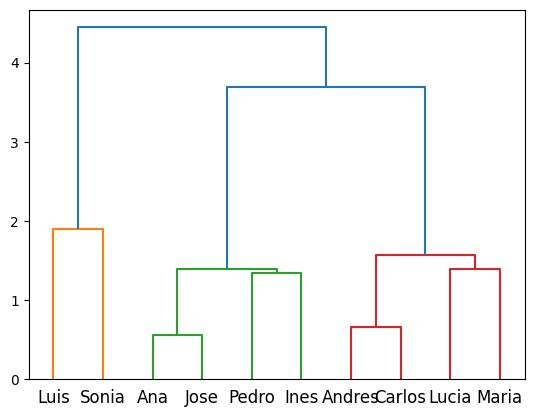

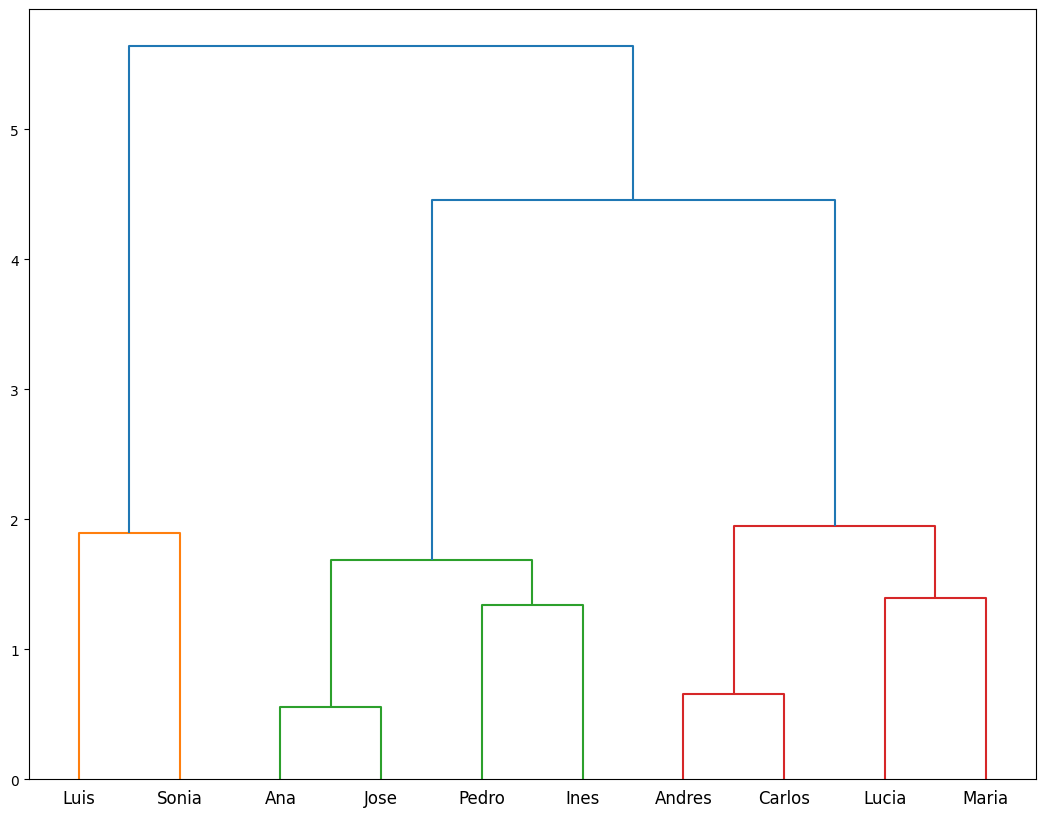

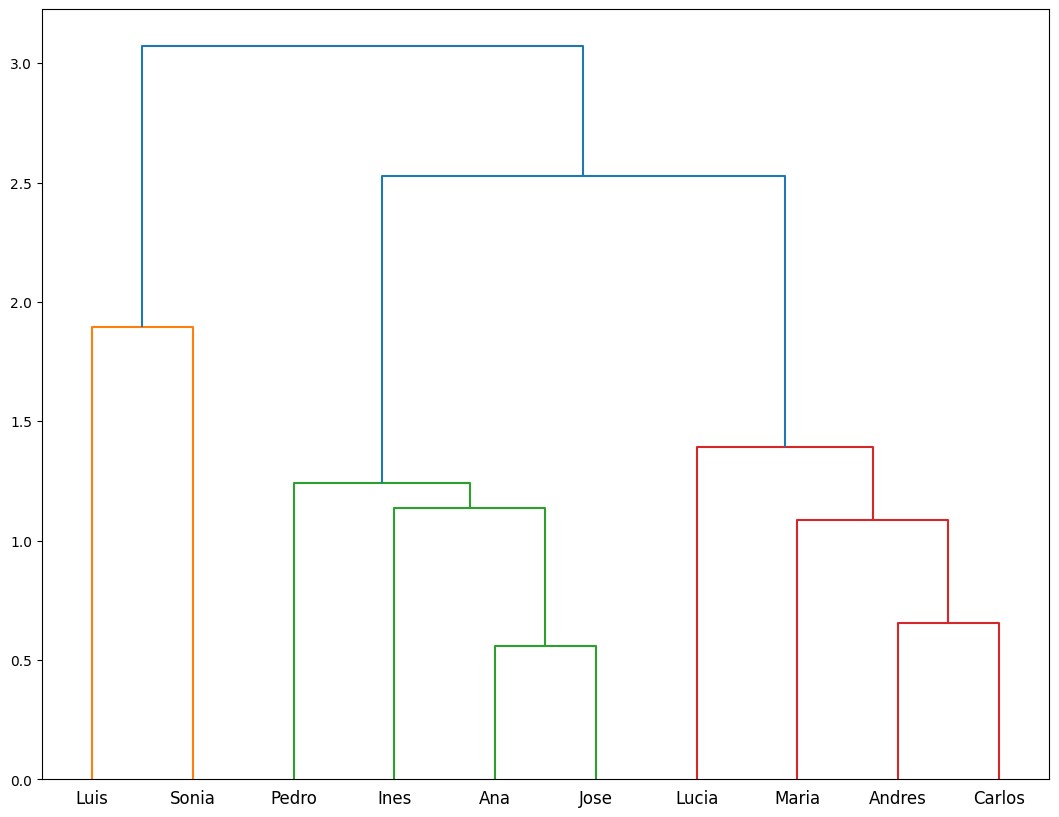

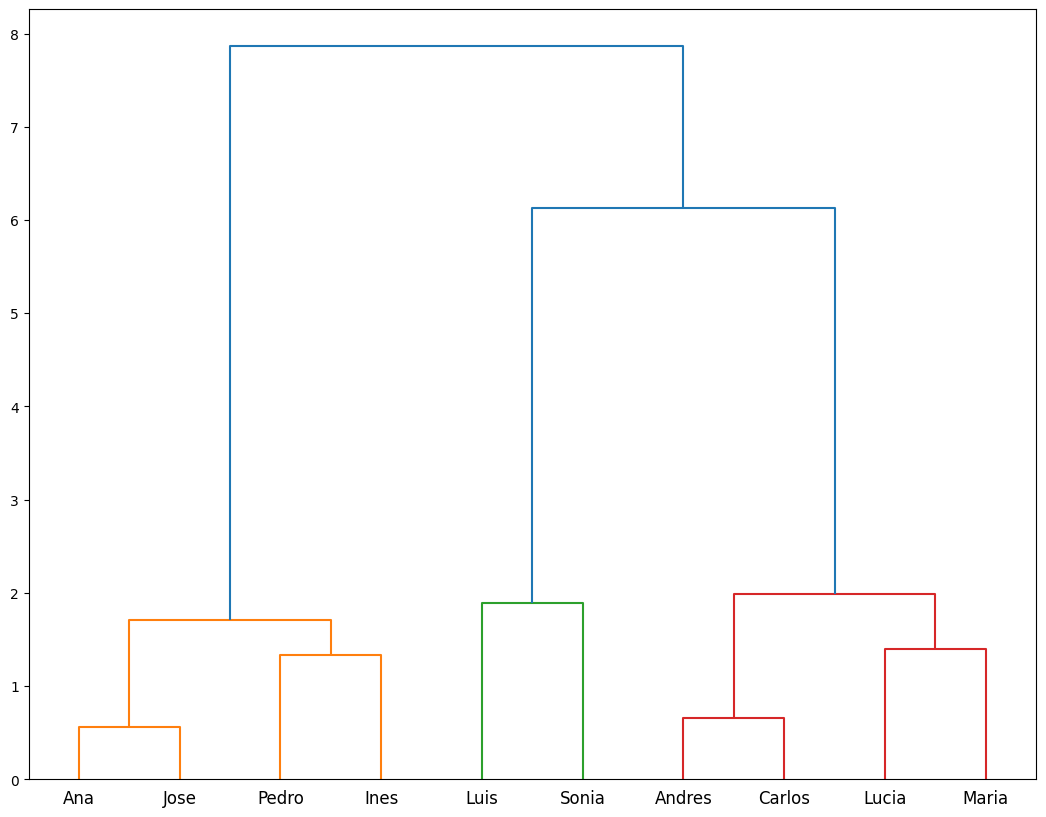

In [ ]:
dendrogram(average_res, labels=datos.index.tolist())
plt.figure(figsize=(13,10))
dendrogram(complete_res, labels=datos.index.tolist())
plt.figure(figsize=(13,10))
dendrogram(single_res, labels=datos.index.tolist())
plt.figure(figsize=(13,10))
dendrogram(word_res, labels=datos.index.tolist())

#### Interpretación con 3 clusteres - Gáfico de Barras

[2 0 0 1 2 0 2 0 1 2]
[[7.7   9.475 7.625 7.75  6.75 ]
 [5.5   6.25  6.5   6.25  8.85 ]
 [6.525 6.525 8.475 8.875 7.375]]


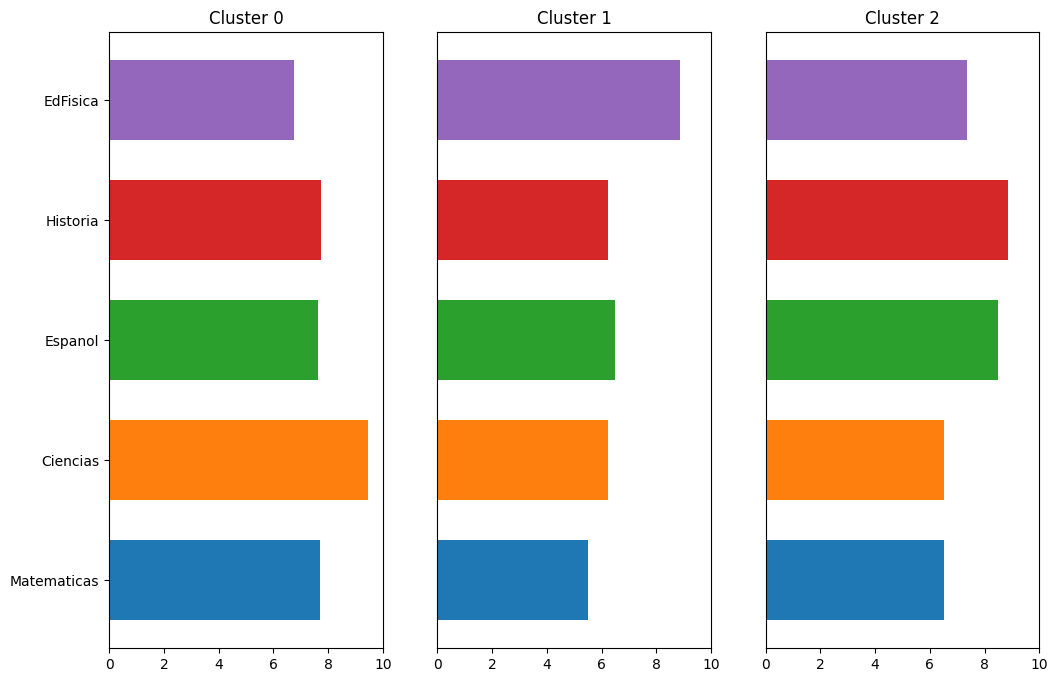

In [ ]:
grupos = fcluster(linkage(pdist(datos),method = 'ward', metric='euclidean'), 3, criterion='maxclust')
grupos = grupos - 1
print(grupos)
centros = np.array(pd.concat([centroide(0, datos, grupos),
                              centroide(1, datos, grupos),
                              centroide(2, datos, grupos)]))
print(centros)
plt.figure(1,figsize=(12,8))
bar_plot(centros, datos.columns)